In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons

In [2]:
mean_1 = np.array([0.5,0.5])
mean_2 = np.array([3,4])

cov_1 = np.array([[1,0.5],[0.5,0.75]])
cov_2 = np.array([[1.5,0.1],[0.1,1]])

distri_1 = np.random.multivariate_normal(mean_1,cov_1,500)
distri_2 = np.random.multivariate_normal(mean_2,cov_2,500)

In [3]:
print (distri_1.shape, distri_2.shape)

((500, 2), (500, 2))


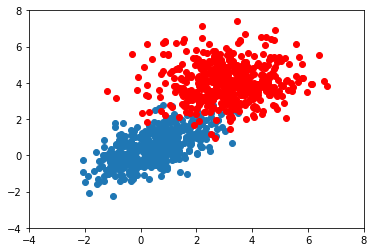

In [4]:
plt.figure()
plt.xlim(-4,8)
plt.ylim(-4,8)

plt.scatter(distri_1[:,0],distri_1[:,1])
plt.scatter(distri_2[:,0],distri_2[:,1],color='red')
plt.show()

In [5]:
data = np.ones((1000,3)) # r = distri_1.shape[0] + distri_2.shape[0] && c = distri_1.shape[1] + 1
labels = np.zeros((1000,1))

data[:500,1:] = distri_1
data[500:,1:] = distri_2
labels[500:,:] = 1.0
               
print (data.shape, labels.shape)

((1000, 3), (1000, 1))


In [6]:
data

array([[ 1.        , -0.6839149 ,  0.80031161],
       [ 1.        , -0.17642373, -0.74621771],
       [ 1.        ,  2.40659207,  1.15068164],
       ...,
       [ 1.        ,  1.26213095,  4.75387945],
       [ 1.        ,  2.27698789,  3.20166318],
       [ 1.        ,  2.08060671,  4.37398622]])

In [7]:
X, y = shuffle(data, labels, random_state=0)

In [8]:
print(X[:5],y[:5])

(array([[ 1.        ,  0.74472353,  2.4409789 ],
       [ 1.        ,  2.66673885,  4.61478646],
       [ 1.        ,  0.14088558, -1.08925318],
       [ 1.        ,  2.67485158,  4.4211063 ],
       [ 1.        ,  2.9209698 ,  2.68670246]]), array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]]))


In [9]:
split = int(0.80*X.shape[0])

X_train = X[:split,:]
X_test = X[split:,:]

y_train = y[:split,:]
y_test = y[split:,:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

((800, 3), (800, 1))
((200, 3), (200, 1))


## Logistic Regression 

In [10]:
def hypothesis(x,theta):
    h = (x*theta).sum()
    return sigmod(h)

def sigmod(x):
    return 1.0 / (1.0 + np.exp(-1.0*x))

def get_error(y_true, x, theta):
    err = 0.0
    
    # m = no. of training samples
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 1:
            err += -1.0*np.log2(hypothesis(x[ix],theta))
        else:
            err += -1.0*np.log2(1-hypothesis(x[ix],theta))
    
    err /= m
    return err

def get_grads(y_true, x, theta):
    grads = np.zeros(theta.shape)
    
    m = x.shape[0]
    
    for ix in range(m):
        grads += (y_true[ix] - hypothesis(x[ix],theta))*x[ix]*-1
        
    grads = grads/m
    
    return grads

def gradient_descent(x, y_true, theta, lr = 0.1):
    
    err = get_error(y_true,x,theta)
    grads = get_grads(y_true,x,theta)
    
    theta = theta - lr*grads
    
    return err, theta

def predict(x,theta):
    prob = hypothesis(x,theta)
    
    if prob < 0.5:
        return 0
    else:
        return 1

def get_accuracy(x_test,y_test, theta):
    y_pred = []
    for ix in range(x_test.shape[0]):
        y_pred.append(predict(x_test[ix],theta))
    y_pred = np.array(y_pred).reshape(-1,1)
    
    return float((y_pred==y_test).sum())/y_test.shape[0]

In [11]:
loss = []
acc = []

theta = np.random.random(X_train.shape[1])
theta[0] = 0
print theta

[0.         0.96710355 0.52322891]


In [12]:
for ix in range(200):
    l,theta = gradient_descent(X_train,y_train,theta,lr=0.5)
    acc.append(get_accuracy(X_test,y_test,theta))
    loss.append(l)

In [13]:
theta

array([-4.64721217,  0.43167132,  1.86779017])

In [14]:
loss[-10:]

[0.13698943739863256,
 0.13674376635868565,
 0.1365002937730554,
 0.1362589893699953,
 0.13601982344238517,
 0.13578276683446325,
 0.13554779092893776,
 0.13531486763445533,
 0.1350839693734267,
 0.13485506907018768]

In [15]:
acc[-10:]

[0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]

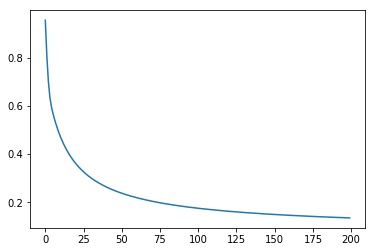

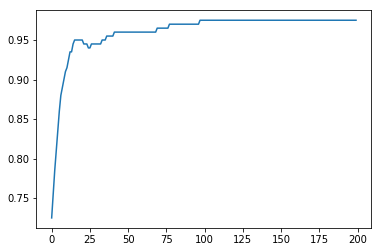

In [16]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)

## On non-linear data

In [17]:
X, y = make_moons(n_samples=1000, shuffle=True, noise = 0.05, random_state=1)

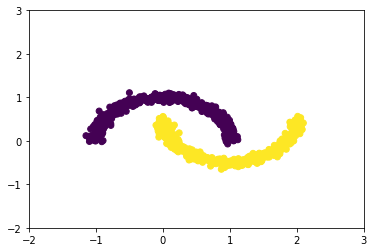

In [18]:
plt.figure()
plt.xlim(-2,3)
plt.ylim(-2,3)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [19]:
X_ = np.ones((1000,3)) # r = distri_1.shape[0] + distri_2.shape[0] && c = distri_1.shape[1] + 1

X_[:,1:] = X
               
print (X_.shape, y.shape)

((1000, 3), (1000,))


In [20]:
X_[:10]

array([[ 1.        ,  0.06645624,  0.39819469],
       [ 1.        ,  1.40913481, -0.48396229],
       [ 1.        , -0.90597929,  0.21777417],
       [ 1.        , -0.68590274,  0.78602512],
       [ 1.        ,  0.03608008,  1.07239344],
       [ 1.        ,  1.860951  ,  0.09188287],
       [ 1.        , -0.03595189,  0.98991939],
       [ 1.        ,  1.44106672, -0.400926  ],
       [ 1.        , -0.4998889 ,  1.10636961],
       [ 1.        ,  0.98522437,  0.30899035]])

In [21]:
split = int(0.80*X.shape[0])

X_train = X_[:split,:]
X_test = X_[split:,:]

y_train = y[:split].reshape(-1,1)
y_test = y[split:].reshape(-1,1)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

((800, 3), (800, 1))
((200, 3), (200, 1))


In [22]:
loss = []
acc = []

theta = np.random.random(X_train.shape[1])
theta[0] = 0
print theta

[0.         0.66850714 0.54159024]


In [23]:
for ix in range(200):
    l,theta = gradient_descent(X_train,y_train,theta,lr=0.5)
    acc.append(get_accuracy(X_test,y_test,theta))
    loss.append(l)

In [24]:
loss[-10:]

[0.3790503742596447,
 0.3788166432060981,
 0.3785854832057477,
 0.37835685772979377,
 0.37813073089119476,
 0.37790706743129,
 0.37768583270674766,
 0.3774669926768261,
 0.3772505138909464,
 0.37703636347655545]

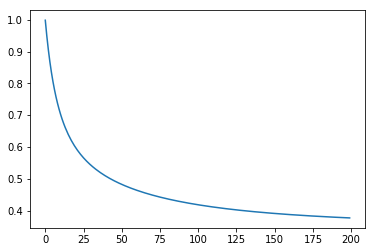

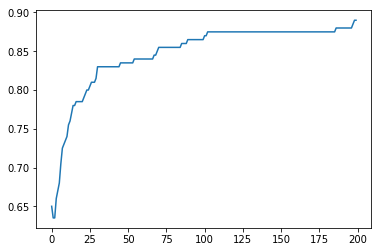

In [26]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)